In [1]:
#import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from glob import glob

In [2]:
#resize all images to the expected size
image_size = [224, 224]

#set train, test, validation dataset path
train_path = '/content/drive/My Drive/Datasets/Tomato Leaf Disease Prediction/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/drive/My Drive/Datasets/Tomato Leaf Disease Prediction/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
#import the InceptionV3 architecture and add preprocessing layer, we are using ImageNet weights
InceptionV3_model = keras.applications.inception_v3.InceptionV3(input_shape = image_size + [3], weights = 'imagenet', include_top = False)

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
#freeze the weights of the pre-trained layers
for layer in InceptionV3_model.layers:
  layer.trainable = False

In [ ]:
#useful for getting number of output classes
folders = glob('/content/drive/My Drive/Datasets/Tomato Leaf Disease Prediction/New Plant Diseases Dataset(Augmented)/train/*')
folders

['/content/drive/My Drive/Datasets/Tomato Leaf Disease Prediction/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Prediction/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Prediction/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Prediction/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Prediction/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Prediction/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/My Drive/Datasets/Tomato Leaf Disease Prediction/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/My Drive/Datasets/

In [ ]:
#adding our own layers
layer_flatten = keras.layers.Flatten()(InceptionV3_model.output)
output = keras.layers.Dense(len(folders), activation = "softmax")(layer_flatten)
model = keras.Model(inputs = InceptionV3_model.input, outputs = output)

In [ ]:
#summary of our model
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
#compile the model and specify loss function and optimizer
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [3]:
#use the ImageDataGenerator class to load images from the dataset
train_data_generator = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   validation_split=0.2)

In [4]:
#make sure you provide the same target size as initialied for the image size
training_set = train_data_generator.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 subset='training')

validation_set = train_data_generator.flow_from_directory(train_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            subset='validation')

Found 10927 images belonging to 10 classes.
Found 2730 images belonging to 10 classes.


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
342/342 [==============================] - 4206s 12s/step - loss: 2.5719 - accuracy: 0.6845 - val_loss: 3.0559 - val_accuracy: 0.6766
Epoch 2/10
342/342 [==============================] - 1544s 5s/step - loss: 1.9607 - accuracy: 0.7825 - val_loss: 2.5172 - val_accuracy: 0.7421
Epoch 3/10
342/342 [==============================] - 1537s 4s/step - loss: 1.8687 - accuracy: 0.8138 - val_loss: 2.3462 - val_accuracy: 0.7722
Epoch 4/10
342/342 [==============================] - 1539s 4s/step - loss: 1.6272 - accuracy: 0.8434 - val_loss: 3.3151 - val_accuracy: 0.7524
Epoch 5/10
342/342 [==============================] - 1534s 4s/step - loss: 1.6031 - accuracy: 0.8533 - val_loss: 2.8971 - val_accuracy: 0.7941
Epoch 6/10
342/342 [==============================] - 1539s 4s/step - loss: 1.5567 - accuracy: 0.8626 - val_loss: 4.7885 - val_accuracy: 0.7271
Epoch 7/10
342/342 [==============================] - 1540s

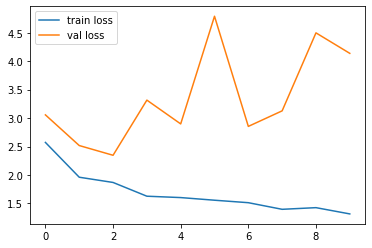

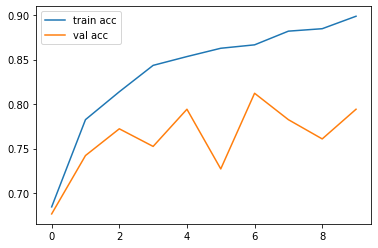

<Figure size 432x288 with 0 Axes>

In [ ]:
#train the model
history = model.fit_generator(
  training_set,
  validation_data = validation_set,
  epochs = 10,
  steps_per_epoch = len(training_set),
  validation_steps = len(validation_set)
)

#save the model as an h5 file
model.save('/content/drive/My Drive/Datasets/Tomato Leaf Disease Prediction/model_InceptionV3.h5')

#plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

#plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [5]:
model = keras.models.load_model('/content/drive/My Drive/Datasets/Tomato Leaf Disease Prediction/model_InceptionV3.h5')

In [8]:
model.evaluate(validation_set)

86/86 [==============================] - 34s 400ms/step - loss: 4.2438 - accuracy: 0.7857


[4.2437639236450195, 0.7857142686843872]

In [7]:
#using the model to make predictions
y_pred = model.predict(validation_set)
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 9, 1, ..., 4, 2, 5])